In [51]:
import numpy as np
import matplotlib.pyplot as plt

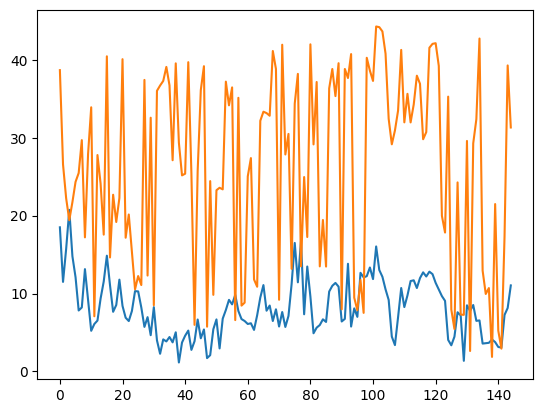

In [52]:
error = np.load('error.npy')
error[:,1] = np.where(abs(error[:,1])<abs(180-error[:,1]),error[:,1],180-error[:,1])
error[:,1] = np.where(abs(error[:,1])<abs(90-error[:,1]),error[:,1],90-error[:,1])
# 绘图
mask = np.where(error[:,0]>40)
error[mask] = 0
plt.plot(np.arange(error.shape[0]),error[:,0:2])
plt.show()

In [53]:
error_z = (error[:,0])
error_ori = (error[:,1])
np.sum(error_z)/(error.shape[0]-len(mask[0]))

8.172966782334838

In [54]:
np.sum(error_ori)/(error.shape[0]-len(mask[0]))

26.14276958568517

In [58]:
np.where(error[:,1]>40)
error[134,1]

42.72899859443336

In [23]:
from autolab_core import Logger, RigidTransform
import numpy as np

pose = [-1.03513,5.19284,43.8488,0.617701,-0.485802,-0.427784,0.44659]

T_qua2rota = RigidTransform(
    rotation=np.array([pose[3], pose[4], pose[5], pose[6]]),
    translation=np.array([pose[0], pose[1], pose[2]]),
    from_frame="marker_5",
    to_frame="world",
)
T4 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(0),
    translation=np.array([0.0,0.0,13.1]),
    from_frame="shuangji2_4",
    to_frame="shuangji_3",
)
T5 = RigidTransform(
    rotation=RigidTransform.z_axis_rotation(np.pi/2),
    translation=np.array([0.0,0.0,0.0]),
    from_frame="shuangji2_5",
    to_frame="shuangji2_4",
)
T6 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(np.pi),
    translation=np.array([0.0,0.0,0.0]),
    from_frame="shuangji2_6",
    to_frame="shuangji2_5",
)

T2_4 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(0),
    translation=np.array([1.2, 0, 13.11-6.10]),
    from_frame="shuangji3_4",
    to_frame="shuangji_3",
)            
T2_5 = RigidTransform(
    rotation=RigidTransform.y_axis_rotation(30*np.pi/180),
    translation=np.array([0.0,0.0,0.0]),
    from_frame="shuangji3_5",
    to_frame="shuangji3_4",
)            
T2_6 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(0),
    translation=np.array([0.79-1.2, 0, 6.10]),
    from_frame="shuangji3_6",
    to_frame="shuangji3_5",
)
T2_7 = RigidTransform(
    rotation=RigidTransform.z_axis_rotation(np.pi/2),
    translation=np.array([0.0,0.0,0.0]),
    from_frame="shuangji3_7",
    to_frame="shuangji3_6",
)            
T2_8 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(-np.pi/2),
    translation=np.array([0,0,0]),
    from_frame="shuangji3_8",
    to_frame="shuangji3_7",
)


Tm_4 = RigidTransform(
    rotation=RigidTransform.z_axis_rotation((-150)*np.pi/180),  # dataset1 + 45
    translation=np.array([0.0,0.0,0.0]),
    from_frame="marker_4",
    to_frame="shuangji_3",
)
Tm_5 = RigidTransform(
    rotation=RigidTransform.x_axis_rotation(0),
    translation=np.array([0, 0, -4.5]),  #-(- 4.237 + 6.3 + 1.3)
    from_frame="marker_5",
    to_frame="marker_4",
)

pose_base = T_qua2rota*(Tm_4*Tm_5).inverse()
pose = T_qua2rota*(Tm_4*Tm_5).inverse()*(T4*T5*T6)  # 定钳头
pose2 = T_qua2rota*(Tm_4*Tm_5).inverse()*(T2_4*T2_5*T2_6*T2_7*T2_8)  # 动钳头

In [66]:
pose2.translation

array([-18.45175338,   5.88802551,  44.3704294 ])

In [67]:
pose2.euler

array([ 14.21451402, -53.45257913, -89.97191437])

In [24]:
pose_base.translation

array([-5.36590277,  6.17416703, 44.57777497])

In [25]:
pose_base.euler

array([  78.5994665 ,   34.96180383, -109.35850437])

In [72]:
import numpy as np
from plyfile import PlyData, PlyElement
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

def write_ply(points, filename):
    """ input: Nx3, write points to filename as PLY format. """
    points = [(points[i,0], points[i,1], points[i,2]) for i in range(points.shape[0])]
    vertex = np.array(points, dtype=[('x', 'f4'), ('y', 'f4'),('z', 'f4')])
    el = PlyElement.describe(vertex, 'vertex', comments=['vertices'])
    PlyData([el], text=True).write(filename)

def rotz(t):
    """Rotation about the z-axis."""
    c = np.cos(t)
    s = np.sin(t)
    return np.array([[c, -s,  0],
                     [s,  c,  0],
                     [0,  0,  1]])


bboxes = np.load('000003_bbox.npy')
point_cloud = np.load('000003_pc.npz')['pc']
point_votes = np.load('000003_votes.npz')['point_votes']



idx = np.where(point_votes[:,0]==1)
point_cloud = point_cloud[idx,:]
print(bboxes[0,0:3])
print(R.from_euler('XYZ',bboxes[0,3:6]).as_euler('xyz')*180/np.pi)
write_ply(point_cloud, 'out.ply')

# box_halfl = 7.0
# box_halfw = 2.0
# box_halfh = 2.5
# kpts_votes = np.zeros((point_cloud.shape[0], 3*8))  # N,3*8
# R_base = R.from_euler('XYZ', bboxes[0,3:6]).as_matrix()
# kpts_votes = np.zeros((8,point_cloud.shape[0],3))
# kpts_votes[0,:,:] = np.dot(np.array([box_halfw,-box_halfh,0.0]),R_base.T)+bboxes[0,0:3]-point_cloud
# kpts_votes[1,:] = np.dot(np.array([box_halfw,box_halfh,0.0]),R_base.T)+bboxes[0,0:3]
# kpts_votes[2,:] = np.dot(np.array([-box_halfw,box_halfh,0.0]),R_base.T)+bboxes[0,0:3]
# kpts_votes[3,:] = np.dot(np.array([-box_halfw,-box_halfh,0.0]),R_base.T)+bboxes[0,0:3]
# kpts_votes[4,:] = np.dot(np.array([box_halfw,-box_halfh,box_halfl]),R_base.T)+bboxes[0,0:3]
# kpts_votes[5,:] = np.dot(np.array([box_halfw,box_halfh,box_halfl]),R_base.T)+bboxes[0,0:3]
# kpts_votes[6,:] = np.dot(np.array([-box_halfw,box_halfh,box_halfl]),R_base.T)+bboxes[0,0:3]
# kpts_votes[7,:] = np.dot(np.array([-box_halfw,-box_halfh,box_halfl]),R_base.T)+bboxes[0,0:3]
# write_ply(kpts_votes, 'key.ply')

[13.5535145  1.9332902 36.657524 ]
[ 37.41121441 -45.25930847  23.59038791]


ValueError: setting an array element with a sequence.

In [60]:
import numpy as np
depth_map = np.random.rand(6,5)
depth_map[0,:] = 0
depth_map[:,-1] = 0
depth_map[:,0] = 0
depth_map[2,-2] = 0
depth_map[4,-2] = 0
depth_map[4,-3] = 0
depth_map[5,-2] = 0
print(depth_map)

for i in range(depth_map.shape[0]):
    arr = np.where(depth_map[i,:]>0.0000001)[0]
    if (arr.size>0 and ):
        depth_map[i,max(arr)] += np.random.rand()

print(depth_map)

[[0.         0.         0.         0.         0.        ]
 [0.         0.27241555 0.20943988 0.54755144 0.        ]
 [0.         0.40720854 0.46967408 0.         0.        ]
 [0.         0.53730351 0.21156634 0.51941779 0.        ]
 [0.         0.56464669 0.         0.         0.        ]
 [0.         0.59389958 0.28348048 0.         0.        ]]
[[0.         0.         0.         0.         0.        ]
 [0.         0.27241555 0.20943988 1.32164576 0.        ]
 [0.         0.40720854 1.07021274 0.         0.        ]
 [0.         0.53730351 0.21156634 1.18896436 0.        ]
 [0.         1.08756573 0.         0.         0.        ]
 [0.         0.59389958 0.47309427 0.         0.        ]]


In [66]:
a = np.random.rand(8).reshape(-1,1)
b = np.random.rand(8).reshape(-1,1)
np.concatenate((a,b),axis=1)

array([[0.17426822, 0.978946  ],
       [0.27231536, 0.2353162 ],
       [0.24989721, 0.65812705],
       [0.94059799, 0.52303469],
       [0.09224558, 0.78500872],
       [0.23306822, 0.39096115],
       [0.74728345, 0.43586928],
       [0.26915099, 0.62604905]])

In [56]:
np.where(depth_map[0,:]>0.01)[0].size==0

True